## Import Libraries

In [1]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics

# Evaluation
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## Drive Mount

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
dataframe = pd.read_csv("/content/drive/MyDrive/Defense/Implementation/Final/Main Dataset.csv", na_values="?")
dataframe.tail(10)

,Gender,Age,Occupation,Psychological State,Having personal issues,Rest at work,Social Media Use in Working Hour,Fitted with skill,Comfortable,Dream Job,...,LinkedIn,YouTube,TikTok,Likee,WhatsApp,Messenger,IMO,Telegram,Spent Time on Social Media,Understanding Unethical Practice
1990,Male,30-42,Government Job,3,No,Yes,Yes,Yes,No,No,...,Professional,Entertainment,Entertainment,Entertainment,Chatting,I Don't Use,I Don't Use,I Don't Use,3,Maybe
1991,Male,40+,Government Job,1,No,Yes,No,Yes,No,Yes,...,Professional,Passing Time,I Don't Use,I Don't Use,Chatting,Chatting,Passing Time,I Don't Use,3,No
1992,Female,18-27,Government Job,2,Yes,No,Yes,No,Yes,No,...,Professional,Chatting,I Don't Use,Passing Time,Chatting,I Don't Use,Passing Time,Chatting,4,Yes
1993,Female,20-32,Government Job,3,Yes,No,No,Yes,No,Yes,...,Professional,Passing Time,I Don't Use,Entertainment,Chatting,Professional,Passing Time,Chatting,4,No
1994,Female,25-30,Government Job,4,Yes,No,Yes,Yes,Yes,No,...,Passing Time,Passing Time,Chatting,Chatting,Chatting,Passing Time,I Don't Use,I Don't Use,4,Yes
1995,Female,25-30,Government Job,4,Yes,No,Yes,No,No,Yes,...,Chatting,I Don't Use,I Don't Use,Passing Time,Passing Time,Professional,Passing Time,Chatting,4,No
1996,Female,30-42,Government Job,4,Yes,No,Yes,Yes,Yes,No,...,Passing Time,Chatting,Passing Time,I Don't Use,I Don't Use,I Don't Use,Professional,Passing Time,3,Yes
1997,Female,35-40,Government Job,4,Yes,No,Yes,Yes,Yes,Yes,...,Entertainment,Entertainment,I Don't Use,I Don't Use,Chatting,Chatting,Chatting,Chatting,4,No
1998,Female,35-40,Government Job,3,Yes,No,Yes,No,No,Yes,...,Professional,Professional,Passing Time,I Don't Use,Chatting,Passing Time,Professional,Entertainment,3,No
1999,Female,40+,Government Job,5,Yes,No,Yes,Yes,No,Yes,...,I Don't Use,Passing Time,Entertainment,I Don't Use,I Don't Use,Chatting,I Don't Use,I Don't Use,4,Maybe


In [5]:
dataframe.describe()

,Psychological State,Spent Time on Social Media
count,2000.000000,2000.000000
mean,3.166000,3.017500
std,1.373822,0.967813
min,1.000000,1.000000
25%,2.000000,3.000000
50%,3.000000,3.000000
75%,4.000000,4.000000
max,5.000000,4.000000


## Data Preprocessing

In [6]:
dataframe.isna().sum()

Gender                               0
Age                                  0
Occupation                           0
Psychological State                  0
Having personal issues               0
Rest at work                         0
Social Media Use in Working Hour     0
Fitted with skill                    0
Comfortable                          0
Dream Job                            0
Having Issues                        0
Challenging                          0
Perfect                              0
Hesitate to share problems           0
Searching for better                 0
Ready to learn new skills            0
Work pressure is more than salary    0
More work then Capability            0
Appreciation                         0
Inspiration                          0
Challenges                           0
Entertainment                        0
Reason to Use Social Media           0
Facebook                             0
Instagram                            0
LinkedIn                 

In [7]:
dataframe

,Gender,Age,Occupation,Psychological State,Having personal issues,Rest at work,Social Media Use in Working Hour,Fitted with skill,Comfortable,Dream Job,...,LinkedIn,YouTube,TikTok,Likee,WhatsApp,Messenger,IMO,Telegram,Spent Time on Social Media,Understanding Unethical Practice
0,Male,18-20,Student,1,Yes,Yes,Yes,Yes,Yes,Yes,...,I Don't Use,I Don't Use,I Don't Use,Chatting,Chatting,Chatting,Chatting,Chatting,1,Yes
1,Male,25-30,Information Technology,3,Yes,No,Yes,Yes,Yes,Yes,...,Professional,Entertainment,I Don't Use,I Don't Use,Chatting,Passing Time,I Don't Use,Professional,3,No
2,Male,25-30,Engineering,1,Yes,Yes,Yes,No,Yes,No,...,Professional,Entertainment,I Don't Use,I Don't Use,Chatting,Chatting,I Don't Use,Chatting,4,Maybe
3,Female,25-30,Student,4,Yes,No,Yes,No,Yes,No,...,Professional,Entertainment,Entertainment,Entertainment,Professional,Entertainment,I Don't Use,I Don't Use,3,Yes
4,Male,20-25,Student,4,Yes,No,No,Yes,No,Yes,...,Professional,Entertainment,Professional,Entertainment,Professional,Professional,Entertainment,Professional,2,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Female,25-30,Government Job,4,Yes,No,Yes,No,No,Yes,...,Chatting,I Don't Use,I Don't Use,Passing Time,Passing Time,Professional,Passing Time,Chatting,4,No
1996,Female,30-42,Government Job,4,Yes,No,Yes,Yes,Yes,No,...,Passing Time,Chatting,Passing Time,I Don't Use,I Don't Use,I Don't Use,Professional,Passing Time,3,Yes
1997,Female,35-40,Government Job,4,Yes,No,Yes,Yes,Yes,Yes,...,Entertainment,Entertainment,I Don't Use,I Don't Use,Chatting,Chatting,Chatting,Chatting,4,No
1998,Female,35-40,Government Job,3,Yes,No,Yes,No,No,Yes,...,Professional,Professional,Passing Time,I Don't Use,Chatting,Passing Time,Professional,Entertainment,3,No


In [8]:
df = dataframe[["Psychological State", "Spent Time on Social Media", "Reason to Use Social Media", "Having personal issues", "Rest at work", "Hesitate to share problems"]]
df

,Psychological State,Spent Time on Social Media,Reason to Use Social Media,Having personal issues,Rest at work,Hesitate to share problems
0,1,1,Non-professional,Yes,Yes,Yes
1,3,3,Professional,Yes,No,Yes
2,1,4,Non-professional,Yes,Yes,Yes
3,4,3,Non-professional,Yes,No,Yes
4,4,2,Non-professional,Yes,No,Yes
...,...,...,...,...,...,...
1995,4,4,Professional,Yes,No,Yes
1996,4,3,Non-professional,Yes,No,Yes
1997,4,4,Professional,Yes,No,Yes
1998,3,3,Professional,Yes,No,No


In [9]:
df.isna().sum()

Psychological State           0
Spent Time on Social Media    0
Reason to Use Social Media    0
Having personal issues        0
Rest at work                  0
Hesitate to share problems    0
dtype: int64

## Logic Description

Logic to build dataset for Machine Learning. By means, we have recombined this logic with interviewed candidates states and reason to use social media. This logic is only explainable by writings. And that is:

If *anyone is happy (psychological state remarks goes above 3), spend too much time on social media (more than 2 hours), use social media for professional purpose (reason to use social media belongs to Professional)*

or

*without having personal issues, enough time to have rest and doesn't feel hasitate to share their problem; only for this cases using social media will be **Ethical**.* 

Unless it will be **Unethical**.

In [10]:
df['decision'] = 'Unethical'

In [11]:
df.loc[
(df['Psychological State'] >= 3) &
(df['Spent Time on Social Media'] >= 2) &
(df['Reason to Use Social Media'] == "Professional") |
(df['Having personal issues'] != "Yes") &
(df['Rest at work'] == "Yes" ) &
(df['Hesitate to share problems'] != "Yes"),

'decision'] = 'Ethical'

In [12]:
df.isna().sum()

Psychological State           0
Spent Time on Social Media    0
Reason to Use Social Media    0
Having personal issues        0
Rest at work                  0
Hesitate to share problems    0
decision                      0
dtype: int64

In [13]:
df["decision"].value_counts()

Unethical    1444
Ethical       556
Name: decision, dtype: int64

### Renaming Column

In [14]:
rename_values = {
    'Psychological State' : 'psychological_state',
    'Spent Time on Social Media' : 'spent_time',
    'Reason to Use Social Media' : 'reason',
    'Having personal issues' : 'personal_issues',
    'Rest at work' : 'rest',
    'Hesitate to share problems' : 'anxiety'
    }

df.rename(columns = rename_values, inplace = True)

In [15]:
df

,psychological_state,spent_time,reason,personal_issues,rest,anxiety,decision
0,1,1,Non-professional,Yes,Yes,Yes,Unethical
1,3,3,Professional,Yes,No,Yes,Ethical
2,1,4,Non-professional,Yes,Yes,Yes,Unethical
3,4,3,Non-professional,Yes,No,Yes,Unethical
4,4,2,Non-professional,Yes,No,Yes,Unethical
...,...,...,...,...,...,...,...
1995,4,4,Professional,Yes,No,Yes,Ethical
1996,4,3,Non-professional,Yes,No,Yes,Unethical
1997,4,4,Professional,Yes,No,Yes,Ethical
1998,3,3,Professional,Yes,No,No,Ethical


### Changing Values

In [16]:
df['reason'] = df['reason'].map({'Professional': 1, 'Non-professional': 0})
df['personal_issues'] = df['personal_issues'].map({'Yes': 1, 'No': 0})
df['rest'] = df['rest'].map({'Yes': 1, 'No': 0})
df['anxiety'] = df['anxiety'].map({'Yes': 1, 'No': 0})
df['decision'] = df['decision'].map({'Ethical': 1, 'Unethical': 0})

In [17]:
data_description = df.describe()
data_description = data_description.to_csv(r'/content/drive/MyDrive/Defense/Implementation/Output/data_description.csv', index = True, header=True)
data_description

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   psychological_state  2000 non-null   int64
 1   spent_time           2000 non-null   int64
 2   reason               2000 non-null   int64
 3   personal_issues      2000 non-null   int64
 4   rest                 2000 non-null   int64
 5   anxiety              2000 non-null   int64
 6   decision             2000 non-null   int64
dtypes: int64(7)
memory usage: 109.5 KB


### Dependent and Independent Variable

In [19]:
X = np.asarray(df[['psychological_state', 'spent_time', 'reason', 'personal_issues', 'rest', 'anxiety']])
X[0:5]

array([[1, 1, 0, 1, 1, 1],
       [3, 3, 1, 1, 0, 1],
       [1, 4, 0, 1, 1, 1],
       [4, 3, 0, 1, 0, 1],
       [4, 2, 0, 1, 0, 1]])

In [20]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.57701743, -2.08511818, -0.65309534,  0.70896375,  1.11790822,
         1.09113725],
       [-0.12086098, -0.01808653,  1.53117001,  0.70896375, -0.89452782,
         1.09113725],
       [-1.57701743,  1.0154293 , -0.65309534,  0.70896375,  1.11790822,
         1.09113725],
       [ 0.60721724, -0.01808653, -0.65309534,  0.70896375, -0.89452782,
         1.09113725],
       [ 0.60721724, -1.05160235, -0.65309534,  0.70896375, -0.89452782,
         1.09113725]])

In [21]:
y = np.asarray(df['decision'])
y[0:5]

array([0, 1, 0, 0, 0])

### Training and Testing Splitting

In [22]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=5)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1500, 6) (1500,)
Test set: (500, 6) (500,)


## Logistic Regression

In [23]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred_lr = logreg.predict(X_test)
acc_log = round(logreg.score(X_test,y_test) * 100, 2)
print("Logistic Regression Accuracy: ", acc_log)

Logistic Regression Accuracy:  86.8


In [24]:
cvs_lr = round((cross_val_score(logreg, X,y,cv=10,scoring='accuracy')).mean()*100,2)
print('Cross Validated Score:', cvs_lr)

Cross Validated Score: 88.0


In [25]:
class_report = classification_report(y_test, Y_pred_lr)
print("Classificiation Report: \n", class_report)

Classificiation Report: 
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       356
           1       0.79      0.74      0.76       144

    accuracy                           0.87       500
   macro avg       0.84      0.83      0.84       500
weighted avg       0.87      0.87      0.87       500



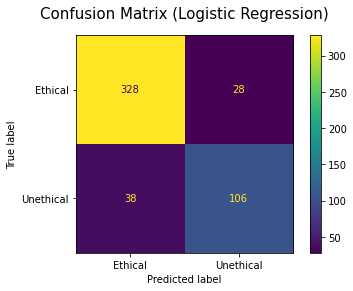

In [26]:
confusion_matrix = metrics.confusion_matrix(y_test, Y_pred_lr)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Ethical', 'Unethical'])
cm_display.plot()
plt.title('Confusion Matrix (Logistic Regression)', y=1.05, size=15)
plt.savefig('/content/drive/MyDrive/Defense/Implementation/Output/CM_LR.png')
plt.show()

## K Nearest Neighbour

In [27]:
Ks = 100
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

Ks_best_value = np.argmax(mean_acc) + 1
print("K's Best Value: ", Ks_best_value)

K's Best Value:  2


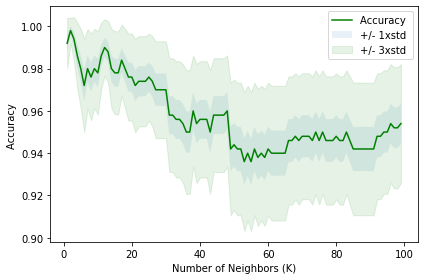

In [28]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Defense/Implementation/Output/Ks_Best_Value.png')
plt.show()

In [29]:
knn = KNeighborsClassifier(n_neighbors = Ks_best_value)
knn.fit(X_train, y_train)
Y_pred_knn = knn.predict(X_test)
acc_knn = round(knn.score(X_test,y_test) * 100, 2)
print("K - Nearest Neighbours Accuracy: ", acc_knn)

K - Nearest Neighbours Accuracy:  99.8


In [30]:
cvs_knn = round((cross_val_score(knn, X,y,cv=10,scoring='accuracy')).mean()*100,2)
print('Cross Validated Score:', cvs_knn)

Cross Validated Score: 99.65


In [31]:
class_report = classification_report(y_test, Y_pred_knn)
print("Classificiation Report: \n", class_report)

Classificiation Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       356
           1       0.99      1.00      1.00       144

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



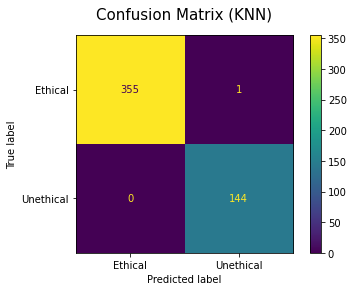

In [32]:
confusion_matrix = metrics.confusion_matrix(y_test, Y_pred_knn)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Ethical', 'Unethical'])
cm_display.plot()
plt.title('Confusion Matrix (KNN)', y=1.05, size=15)
plt.savefig('/content/drive/MyDrive/Defense/Implementation/Output/CM_KNN.png')
plt.show()

## Decision Tree

In [33]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred_dt = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_test,y_test) * 100, 2)
print("Decision Tree Accuracy: ", acc_decision_tree)

Decision Tree Accuracy:  100.0


In [34]:
cvs_dt = round((cross_val_score(decision_tree, X,y,cv=10,scoring='accuracy')).mean()*100,2)
print('Cross Validated Score:', cvs_dt)

Cross Validated Score: 100.0


In [35]:
class_report = classification_report(y_test, Y_pred_dt)
print("Classificiation Report: \n", class_report)

Classificiation Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       356
           1       1.00      1.00      1.00       144

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



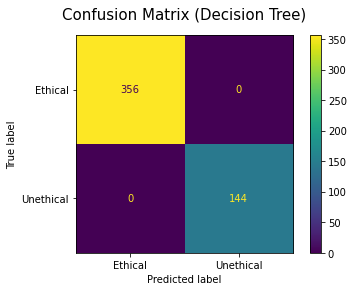

In [36]:
confusion_matrix = metrics.confusion_matrix(y_test, Y_pred_dt)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Ethical', 'Unethical'])
cm_display.plot()
plt.title('Confusion Matrix (Decision Tree)', y=1.05, size=15)
plt.savefig('/content/drive/MyDrive/Defense/Implementation/Output/CM_DT.png')
plt.show()

## Random Forest

In [37]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred_rf = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_test,y_test) * 100, 2)
print("Random Forest Accuracy: ", acc_random_forest)

Random Forest Accuracy:  100.0


In [38]:
cvs_rf = round((cross_val_score(random_forest, X,y,cv=10,scoring='accuracy')).mean()*100,2)
print('Cross Validated Score:', cvs_rf)

Cross Validated Score: 100.0


In [39]:
class_report = classification_report(y_test, Y_pred_rf)
print("Classificiation Report: \n", class_report)

Classificiation Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       356
           1       1.00      1.00      1.00       144

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



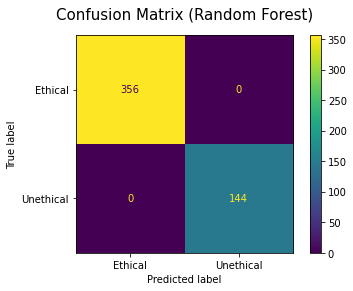

In [40]:
confusion_matrix = metrics.confusion_matrix(y_test, Y_pred_rf)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Ethical', 'Unethical'])
cm_display.plot()
plt.title('Confusion Matrix (Random Forest)', y=1.05, size=15)
plt.savefig('/content/drive/MyDrive/Defense/Implementation/Output/CM_RF.png')
plt.show()

## Gaussian Naive Bayes

In [41]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred_gnb = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_test,y_test) * 100, 2)
print("Gaussian Naive Bayes Accuracy: ", acc_gaussian)

Gaussian Naive Bayes Accuracy:  84.4


In [42]:
cvs_gnb = round((cross_val_score(gaussian, X,y,cv=10,scoring='accuracy')).mean()*100,2)
print('Cross Validated Score:', cvs_gnb)

Cross Validated Score: 85.8


In [43]:
class_report = classification_report(y_test, Y_pred_gnb)
print("Classificiation Report: \n", class_report)

Classificiation Report: 
               precision    recall  f1-score   support

           0       0.91      0.87      0.89       356
           1       0.71      0.78      0.74       144

    accuracy                           0.84       500
   macro avg       0.81      0.83      0.82       500
weighted avg       0.85      0.84      0.85       500



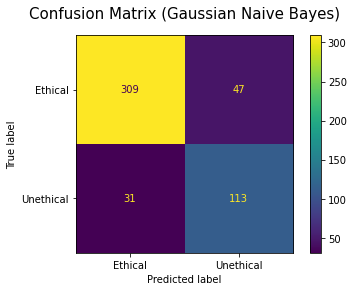

In [44]:
confusion_matrix = metrics.confusion_matrix(y_test, Y_pred_gnb)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Ethical', 'Unethical'])
cm_display.plot()
plt.title('Confusion Matrix (Gaussian Naive Bayes)', y=1.05, size=15)
plt.savefig('/content/drive/MyDrive/Defense/Implementation/Output/CM_GNB.png')
plt.show()

## Support Vector Classifier

In [45]:
svc = SVC()
svc.fit(X_train, y_train)
Y_pred_svm = svc.predict(X_test)
acc_svc = round(svc.score(X_test,y_test) * 100, 2)
print("Support Vector Machines Accuracy: ", acc_svc)

Support Vector Machines Accuracy:  100.0


In [46]:
cvs_svm = round((cross_val_score(svc, X,y,cv=10,scoring='accuracy')).mean()*100,2)
print('Cross Validated Score:', cvs_svm)

Cross Validated Score: 100.0


In [47]:
class_report = classification_report(y_test, Y_pred_svm)
print("Classificiation Report: \n", class_report)

Classificiation Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       356
           1       1.00      1.00      1.00       144

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



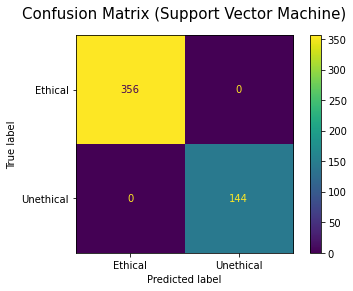

In [48]:
confusion_matrix = metrics.confusion_matrix(y_test, Y_pred_svm)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Ethical', 'Unethical'])
cm_display.plot()
plt.title('Confusion Matrix (Support Vector Machine)', y=1.05, size=15)
plt.savefig('/content/drive/MyDrive/Defense/Implementation/Output/CM_SVM.png')
plt.show()

## ROC Curve

In [49]:
auc_lr = roc_auc_score(y_test, Y_pred_lr)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, Y_pred_lr)

auc_svm = roc_auc_score(y_test, Y_pred_svm)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, Y_pred_svm)

auc_knn = roc_auc_score(y_test, Y_pred_knn)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, Y_pred_knn)

auc_gnb = roc_auc_score(y_test, Y_pred_gnb)
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y_test, Y_pred_gnb)

auc_dt = roc_auc_score(y_test, Y_pred_dt)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, Y_pred_dt)

auc_rf = roc_auc_score(y_test, Y_pred_rf)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, Y_pred_rf)

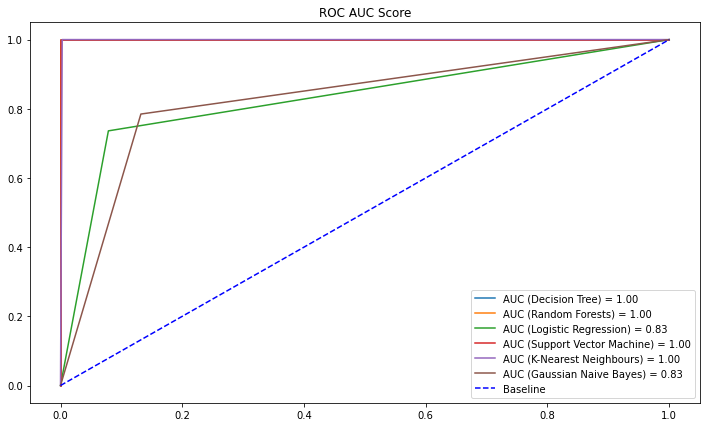

In [50]:
plt.figure(figsize=(12, 7))
plt.plot(fpr_dt, tpr_dt, label=f'AUC (Decision Tree) = {auc_dt:.2f}')
plt.plot(fpr_rf, tpr_rf, label=f'AUC (Random Forests) = {auc_rf:.2f}')
plt.plot(fpr_lr, tpr_lr, label=f'AUC (Logistic Regression) = {auc_lr:.2f}')
plt.plot(fpr_svm, tpr_svm, label=f'AUC (Support Vector Machine) = {auc_svm:.2f}')
plt.plot(fpr_knn, tpr_knn, label=f'AUC (K-Nearest Neighbours) = {auc_knn:.2f}')
plt.plot(fpr_gnb, tpr_gnb, label=f'AUC (Gaussian Naive Bayes) = {auc_gnb:.2f}')

plt.title('ROC AUC Score')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.legend()
plt.savefig('/content/drive/MyDrive/Defense/Implementation/Output/ROC AUC Score.png')

## Mean Squared Error and Mean Absolute Error

In [51]:
lr_mae = round((mean_absolute_error(y_test, Y_pred_lr)*100), 2)
lr_mse = round((mean_squared_error(y_test, Y_pred_lr)*100), 2)

svm_mae = round((mean_absolute_error(y_test, Y_pred_svm)*100), 2)
svm_mse = round((mean_squared_error(y_test, Y_pred_svm)*100), 2)

knn_mae = round((mean_absolute_error(y_test, Y_pred_knn)*100), 2)
knn_mse = round((mean_squared_error(y_test, Y_pred_knn)*100), 2)

gnb_mae = round((mean_absolute_error(y_test, Y_pred_gnb)*100), 2)
gnb_mse = round((mean_squared_error(y_test, Y_pred_gnb)*100), 2)

dt_mae = round((mean_absolute_error(y_test, Y_pred_dt)*100), 2)
dt_mse = round((mean_squared_error(y_test, Y_pred_dt)*100), 2)

rf_mae = round((mean_absolute_error(y_test, Y_pred_rf)*100), 2)
rf_mse = round((mean_squared_error(y_test, Y_pred_rf)*100), 2)

## Final Table

In [52]:
models = pd.DataFrame({
    'Algorithm Name': ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes', 'Decision Tree'],
    'Accuracy Score (%)': [acc_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_decision_tree],
    'Cross Validated Score (%)' : [cvs_svm, cvs_knn, cvs_lr, cvs_rf, cvs_gnb, cvs_dt],
    'AUC Score (%)' : [(round(auc_svm*100, 2)), (round(auc_knn*100, 2)), (round(auc_lr*100, 2)), (round(auc_rf*100, 2)), (round(auc_gnb*100, 2)), (round(auc_dt*100, 2))],
    'Misclassification (%)': [(abs(acc_svc-100)), (abs(acc_knn-100)), (abs(acc_log-100)), (abs(acc_random_forest-100)), (abs(acc_gaussian-100)), (abs(acc_decision_tree-100))],
    'Mean Absolute Error (%)' : [svm_mae, knn_mae, lr_mae, rf_mae, gnb_mae, dt_mae],
    'Mean Squared Error (%)' : [svm_mse, knn_mse, lr_mse, rf_mse, gnb_mse, dt_mse]
}).sort_values("Accuracy Score (%)")

models.to_csv (r'/content/drive/MyDrive/Defense/Implementation/Output/Final Table.csv', index = False, header=True)

models

,Algorithm Name,Accuracy Score (%),Cross Validated Score (%),AUC Score (%),Misclassification (%),Mean Absolute Error (%),Mean Squared Error (%)
4,Naive Bayes,84.4,85.80,82.63,15.6,15.6,15.6
2,Logistic Regression,86.8,88.00,82.87,13.2,13.2,13.2
1,KNN,99.8,99.65,99.86,0.2,0.2,0.2
0,Support Vector Machines,100.0,100.00,100.00,0.0,0.0,0.0
3,Random Forest,100.0,100.00,100.00,0.0,0.0,0.0
5,Decision Tree,100.0,100.00,100.00,0.0,0.0,0.0


## Visualization

In [53]:
Tfont = {'fontname':'DejaVu Sans', 'fontsize':20}
Lfont = {'fontname':'DejaVu Sans', 'fontsize':16}

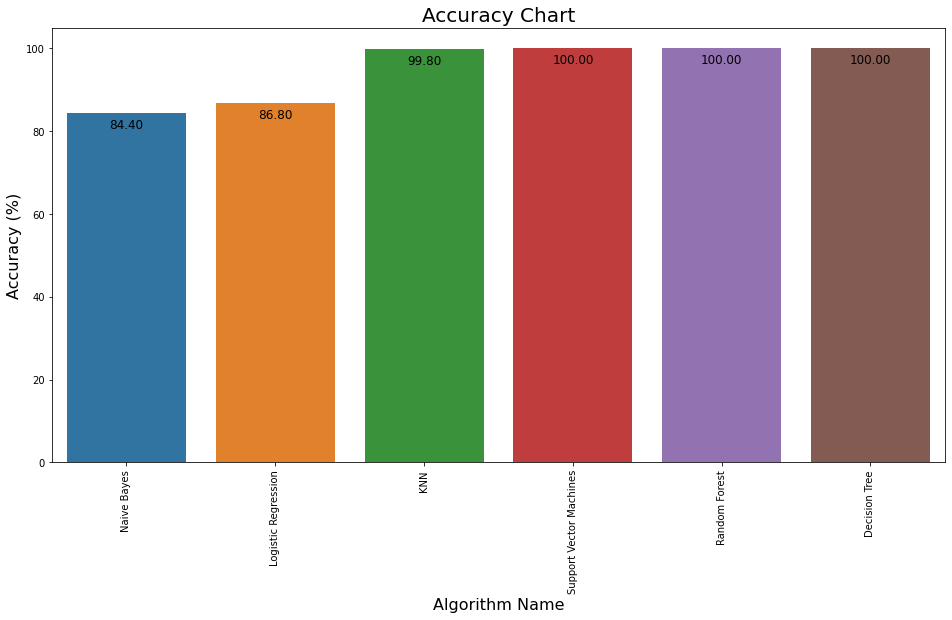

In [54]:
plt.figure(figsize=(16, 8))
splot=sns.barplot(y="Accuracy Score (%)",x="Algorithm Name",data=models)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=12,
                   xytext = (0, -12), 
                   textcoords = 'offset points')

plt.xticks(rotation=90)

plt.title("Accuracy Chart",**Tfont)
plt.ylabel("Accuracy (%)",**Lfont)
plt.xlabel("Algorithm Name",**Lfont)
plt.savefig('/content/drive/MyDrive/Defense/Implementation/Output/Accuracy Chart.png')
plt.show()

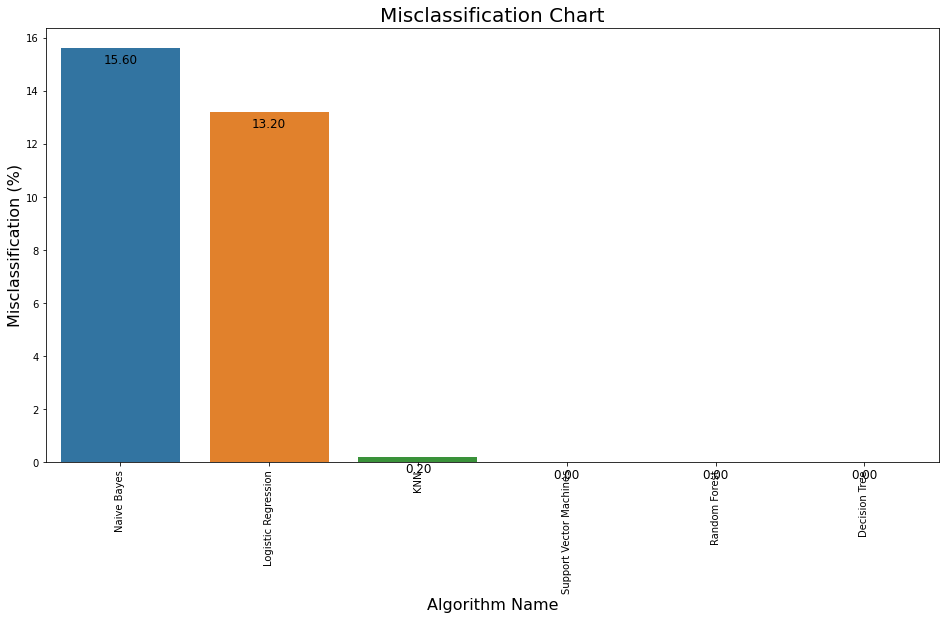

In [55]:
plt.figure(figsize=(16, 8))
splot=sns.barplot(y="Misclassification (%)",x="Algorithm Name",data=models)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=12,
                   xytext = (0, -12), 
                   textcoords = 'offset points')

plt.xticks(rotation=90)

plt.title("Misclassification Chart",**Tfont)
plt.ylabel("Misclassification (%)",**Lfont)
plt.xlabel("Algorithm Name",**Lfont)
plt.savefig('/content/drive/MyDrive/Defense/Implementation/Output/Misclassification Chart.png')
plt.show()

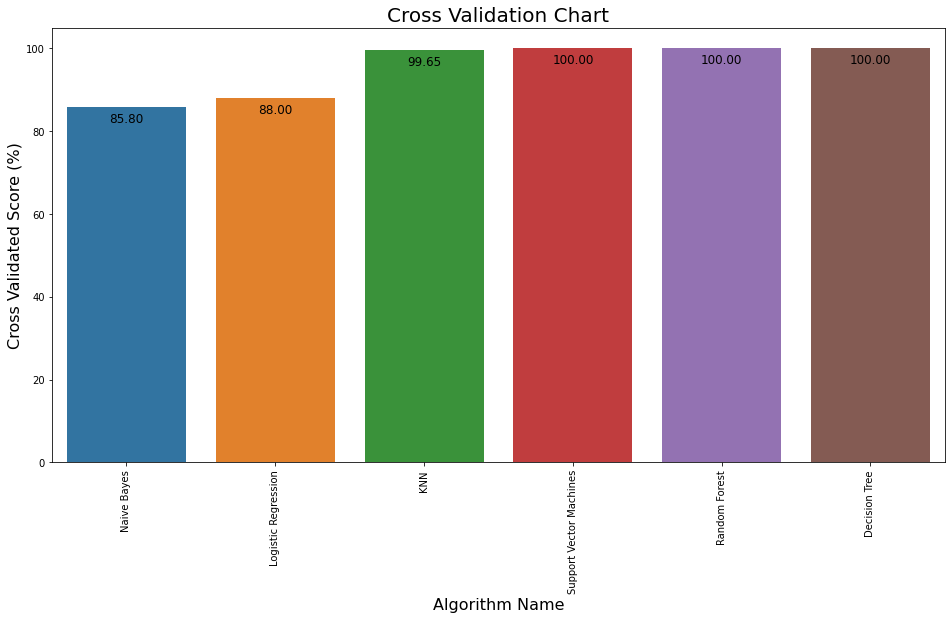

In [56]:
plt.figure(figsize=(16, 8))
splot=sns.barplot(y="Cross Validated Score (%)",x="Algorithm Name",data=models)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=12,
                   xytext = (0, -12), 
                   textcoords = 'offset points')

plt.xticks(rotation=90)

plt.title("Cross Validation Chart",**Tfont)
plt.ylabel("Cross Validated Score (%)",**Lfont)
plt.xlabel("Algorithm Name",**Lfont)
plt.savefig('/content/drive/MyDrive/Defense/Implementation/Output/Cross Validation Chart.png')
plt.show()

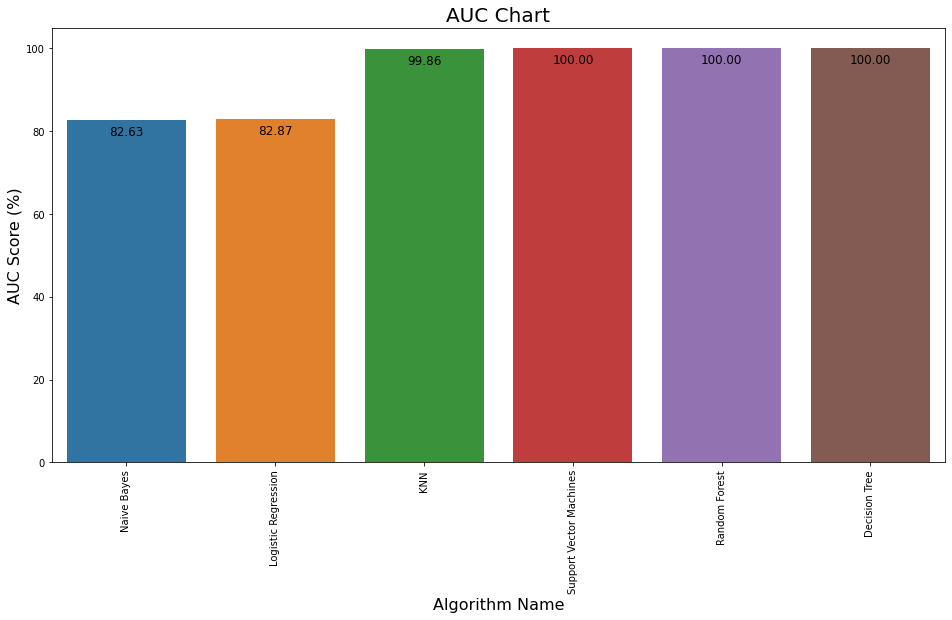

In [57]:
plt.figure(figsize=(16, 8))
splot=sns.barplot(y="AUC Score (%)",x="Algorithm Name",data=models)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=12,
                   xytext = (0, -12), 
                   textcoords = 'offset points')

plt.xticks(rotation=90)

plt.title("AUC Chart",**Tfont)
plt.ylabel("AUC Score (%)",**Lfont)
plt.xlabel("Algorithm Name",**Lfont)
plt.savefig('/content/drive/MyDrive/Defense/Implementation/Output/AUC Score Chart.png')
plt.show()